In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data import and preparation

In [52]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [53]:
raw_data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
raw_data = raw_data.drop(['Calling Code','Capital/Major City','Currency-Code','Largest city','Official language','Out of pocket health expenditure',
                          'Physicians per thousand','Latitude','Longitude'],axis=1)

In [56]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country','Abbreviation'])

In [57]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

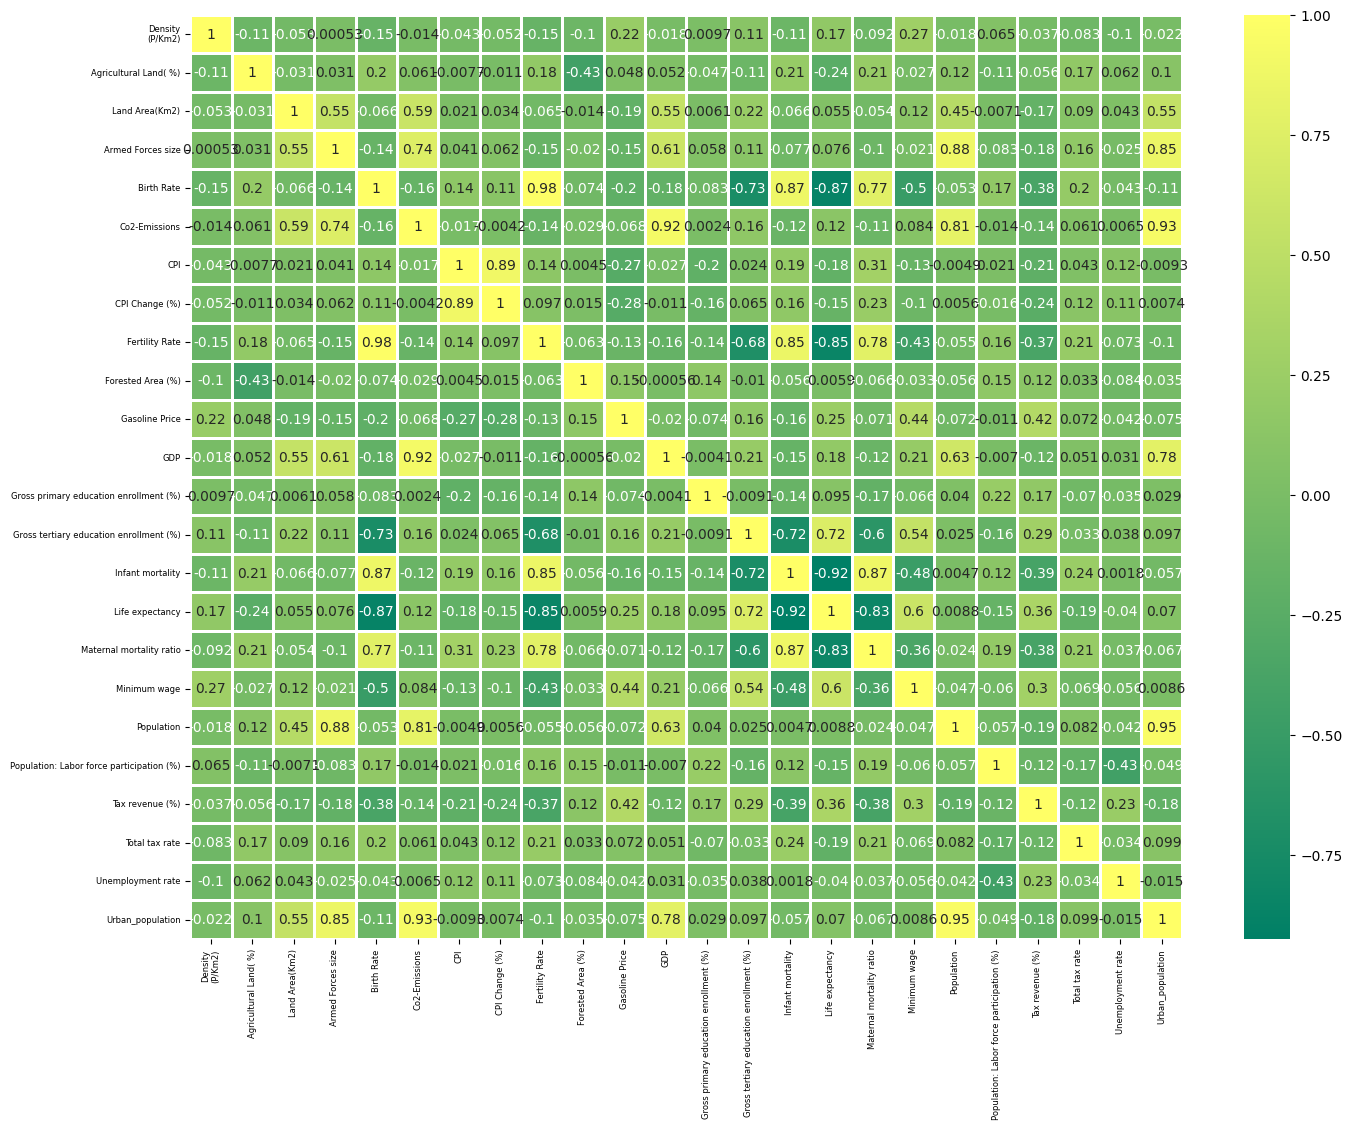

In [73]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country','Abbreviation'],axis=1).corr(),cmap='summer',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

In [ ]:
dataset = raw_data.drop(['Land Area(Km2)','CPI Change (%)','Forested Area (%)','Gross primary education enrollment (%)',
                         'Gross tertiary education enrollment (%)','Minimum wage','Tax revenue (%)','urban_population'],axis=1)

In [60]:
dataset = dataset.rename(columns={'Density\n(P/Km2)': 'Density(P/Km2)','Agricultural Land( %)':'Agricultural Land(%)',
                                  'Population: Labor force participation (%)':'Population: Labor force participation(%)'})

In [61]:
dataset.dropna(inplace=True)

In [62]:
dataset.head()

,Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Armed Forces size,Birth Rate,Co2-Emissions,CPI,Fertility Rate,Gasoline Price,GDP,Infant mortality,Life expectancy,Maternal mortality ratio,Population,Population: Labor force participation(%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.0,AF,58.1,323000.0,32.49,8672.0,149.90,4.47,0.70,1.910135e+10,47.9,64.5,638.0,38041754.0,48.9,71.4,11.12,9797273.0
1,Albania,105.0,AL,43.1,9000.0,11.78,4536.0,119.05,1.62,1.36,1.527808e+10,7.8,78.5,15.0,2854191.0,55.7,36.6,12.33,1747593.0
2,Algeria,18.0,DZ,17.4,317000.0,24.28,150006.0,151.36,3.02,0.28,1.699882e+11,20.1,76.7,112.0,43053054.0,41.2,66.1,11.70,31510100.0
4,Angola,26.0,AO,47.5,117000.0,40.73,34693.0,261.73,5.52,0.97,9.463542e+10,51.6,60.8,241.0,31825295.0,77.5,49.1,6.89,21061025.0
6,Argentina,17.0,AR,54.3,105000.0,17.02,201348.0,232.75,2.26,1.10,4.496634e+11,8.8,76.5,39.0,44938712.0,61.3,106.3,9.79,41339571.0


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 194
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   155 non-null    object 
 1   Density(P/Km2)                            155 non-null    float64
 2   Abbreviation                              155 non-null    object 
 3   Agricultural Land(%)                      155 non-null    float64
 4   Armed Forces size                         155 non-null    float64
 5   Birth Rate                                155 non-null    float64
 6   Co2-Emissions                             155 non-null    float64
 7   CPI                                       155 non-null    float64
 8   Fertility Rate                            155 non-null    float64
 9   Gasoline Price                            155 non-null    float64
 10  GDP                                       1

In [64]:
dataset.describe()

,Density(P/Km2),Agricultural Land(%),Armed Forces size,Birth Rate,Co2-Emissions,CPI,Fertility Rate,Gasoline Price,GDP,Infant mortality,Life expectancy,Maternal mortality ratio,Population,Population: Labor force participation(%),Total tax rate,Unemployment rate,Urban_population
count,155.000000,155.000000,1.550000e+02,155.000000,1.550000e+02,155.000000,155.000000,155.000000,1.550000e+02,155.000000,155.000000,155.000000,1.550000e+02,155.00000,155.000000,155.000000,1.550000e+02
mean,217.206452,39.327097,1.611355e+05,19.952839,2.134846e+05,172.229742,2.637871,0.983355,5.892442e+11,20.729032,72.684516,152.929032,4.837715e+07,62.57871,39.562581,6.768710,2.686539e+07
std,718.512910,21.782196,3.836997e+05,9.933029,9.202853e+05,235.739889,1.277699,0.346959,2.411955e+12,19.580556,7.509052,224.000177,1.611364e+08,10.47005,15.146416,4.919442,8.285695e+07
min,2.000000,0.600000,0.000000e+00,6.400000,2.970000e+02,99.030000,0.980000,0.000000,1.673540e+09,1.400000,52.800000,2.000000,2.870250e+05,38.00000,8.000000,0.090000,8.943100e+04
25%,32.000000,22.650000,1.150000e+04,10.900000,5.456500e+03,115.125000,1.685000,0.745000,1.551194e+10,5.850000,67.200000,11.500000,4.226761e+06,55.95000,30.600000,3.390000,2.269472e+06
50%,83.000000,39.700000,3.100000e+04,17.880000,2.160600e+04,129.180000,2.200000,0.980000,5.421932e+10,13.100000,74.400000,46.000000,1.126308e+07,62.20000,37.500000,5.360000,6.084994e+06
75%,152.500000,54.850000,1.420000e+05,27.085000,9.827400e+04,162.605000,3.410000,1.185000,3.037876e+11,32.250000,77.950000,184.000000,3.695127e+07,68.80000,47.300000,9.090000,2.145289e+07
max,8358.000000,82.600000,3.031000e+06,46.080000,9.893038e+06,2740.270000,6.910000,1.810000,2.142770e+13,84.500000,84.200000,1140.000000,1.397715e+09,86.80000,106.300000,28.180000,8.429340e+08


# exploratory data analysis

In [65]:
# sns.pairplot(dataset)

In [66]:
dataset.drop(['Country','Abbreviation'],axis=1).corr()

,Density(P/Km2),Agricultural Land(%),Armed Forces size,Birth Rate,Co2-Emissions,CPI,Fertility Rate,Gasoline Price,GDP,Infant mortality,Life expectancy,Maternal mortality ratio,Population,Population: Labor force participation(%),Total tax rate,Unemployment rate,Urban_population
Density(P/Km2),1.000000,-0.116715,-0.003821,-0.145806,-0.016916,-0.045756,-0.148887,0.104178,-0.010948,-0.122208,0.170708,-0.088540,0.004725,0.078740,-0.154873,-0.115696,-0.008789
Agricultural Land(%),-0.116715,1.000000,0.055711,0.180111,0.064776,-0.020742,0.168115,0.020023,0.053326,0.182272,-0.240954,0.190142,0.124517,-0.087247,0.129527,0.096569,0.107166
Armed Forces size,-0.003821,0.055711,1.000000,-0.130829,0.772491,0.060715,-0.133814,-0.146308,0.631721,-0.065081,0.070596,-0.108943,0.911643,-0.130504,0.170364,-0.001853,0.885457
Birth Rate,-0.145806,0.180111,-0.130829,1.000000,-0.161143,0.097911,0.981949,-0.206926,-0.193907,0.876728,-0.878196,0.791364,-0.053101,0.194209,0.201409,-0.062130,-0.111866
Co2-Emissions,-0.016916,0.064776,0.772491,-0.161143,1.000000,-0.013330,-0.143361,-0.065367,0.916181,-0.126463,0.118017,-0.113489,0.808184,-0.011597,0.111091,0.013731,0.926004
CPI,-0.045756,-0.020742,0.060715,0.097911,-0.013330,1.000000,0.086298,-0.250802,-0.029918,0.106625,-0.117155,0.067864,0.006328,-0.072683,0.207536,0.109858,0.005335
Fertility Rate,-0.148887,0.168115,-0.133814,0.981949,-0.143361,0.086298,1.000000,-0.147820,-0.165400,0.862347,-0.851430,0.803072,-0.048941,0.190807,0.210213,-0.093278,-0.100738
Gasoline Price,0.104178,0.020023,-0.146308,-0.206926,-0.065367,-0.250802,-0.147820,1.000000,-0.009884,-0.155386,0.255068,-0.078747,-0.063723,-0.004538,0.042320,-0.042629,-0.065770
GDP,-0.010948,0.053326,0.631721,-0.193907,0.916181,-0.029918,-0.165400,-0.009884,1.000000,-0.160812,0.178769,-0.128430,0.627815,-0.003750,0.097296,0.041148,0.781962
Infant mortality,-0.122208,0.182272,-0.065081,0.876728,-0.126463,0.106625,0.862347,-0.155386,-0.160812,1.000000,-0.934371,0.893656,0.012483,0.158994,0.209375,-0.026977,-0.054444


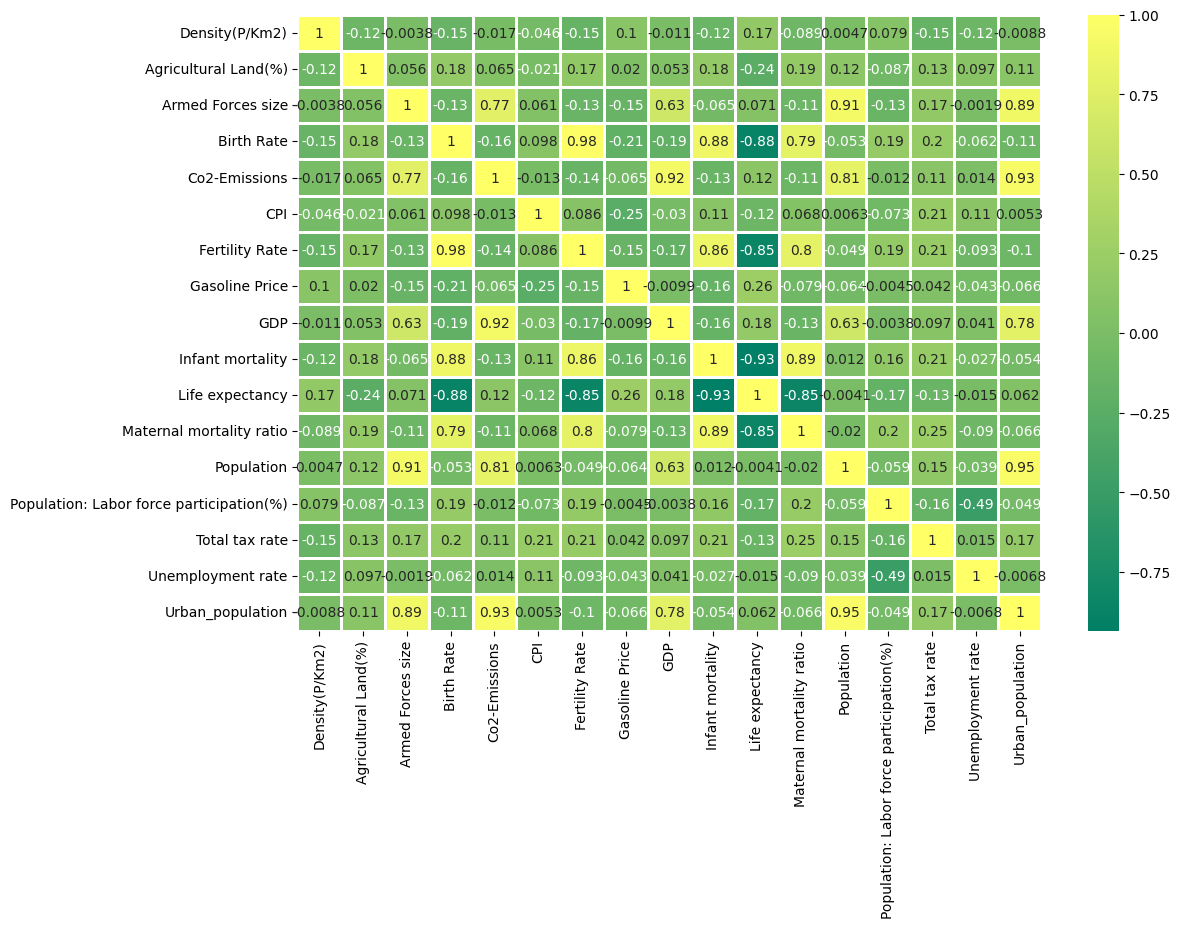

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country','Abbreviation'],axis=1).corr(),cmap='summer',linecolor='white',linewidths=1,annot=True)
plt.show()